# Classic Techniques

- Techniques
    - K-Anonymity
    - L-Diversity
    - T-Closeness
    - Differential Privacy

- Things you can do:
    - Suppression
    - Masking
    - Pseudonymization
    - Generalization
    - Data Swapping
    - Data Perturbation
- Things you cannot do:
    - Synthetic Data.


#ANONYMIZATION(nlp)
##Koushiki


In [35]:
#importing all the libraries that are being used below
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import sklearn
import gensim
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import spacy

In [2]:
#Reading Dataset,Making 2 copies for further use
df=pd.read_csv('HDFS.csv')
df2=pd.read_csv('HDFS.csv')
df

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,E10,PacketResponder <*> for block blk_<*> terminating
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,E10,PacketResponder <*> for block blk_<*> terminating
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,E10,PacketResponder <*> for block blk_<*> terminating
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,E10,PacketResponder <*> for block blk_<*> terminating
...,...,...,...,...,...,...,...,...,...
1995,1996,81111,101621,24902,INFO,dfs.DataNode$DataXceiver,Receiving block blk_4198733391373026104 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1996,1997,81111,101735,26595,INFO,dfs.DataNode$PacketResponder,Received block blk_-5815145248455404269 of siz...,E11,Received block blk_<*> of size <*> from /<*>
1997,1998,81111,101804,26494,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-295306975763175640 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1998,1999,81111,101954,26414,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_52257196770490...,E10,PacketResponder <*> for block blk_<*> terminating


##EDA


In [3]:
#finding if any null value present
df.isnull().sum()

LineId           0
Date             0
Time             0
Pid              0
Level            0
Component        0
Content          0
EventId          0
EventTemplate    0
dtype: int64

In [4]:
#All the feature columns in the dataset
df.columns

Index(['LineId', 'Date', 'Time', 'Pid', 'Level', 'Component', 'Content',
       'EventId', 'EventTemplate'],
      dtype='object')

In [5]:

df.describe()

,LineId,Date,Time,Pid
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,81110.367500,107375.609500,7771.287500
std,577.494589,0.618575,69780.904034,9053.587141
min,1.000000,81109.000000,37.000000,13.000000
25%,500.750000,81110.000000,52286.750000,28.000000
50%,1000.500000,81110.000000,92538.000000,2883.500000
75%,1500.250000,81111.000000,151136.750000,15851.250000
max,2000.000000,81111.000000,235951.000000,26895.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Date           2000 non-null   int64 
 2   Time           2000 non-null   int64 
 3   Pid            2000 non-null   int64 
 4   Level          2000 non-null   object
 5   Component      2000 non-null   object
 6   Content        2000 non-null   object
 7   EventId        2000 non-null   object
 8   EventTemplate  2000 non-null   object
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


In [7]:
#to find the unique levels
df['Level'].unique()

array(['INFO', 'WARN'], dtype=object)

In [8]:

content=df['Content'].unique()
content.shape

(2000,)

In [9]:
df['Component'].unique()

array(['dfs.DataNode$PacketResponder', 'dfs.FSNamesystem',
       'dfs.DataNode$DataXceiver', 'dfs.DataBlockScanner',
       'dfs.FSDataset', 'dfs.DataNode'], dtype=object)

In [10]:
df1=df
df=df.drop(['Level','Component'],axis=1)

In [11]:
#number of unique values corresponding to each feature in dataset
unique_values = df1.nunique()
print(unique_values)

LineId           2000
Date                3
Time             1881
Pid              1054
Level               2
Component           6
Content          2000
EventId            14
EventTemplate      14
dtype: int64


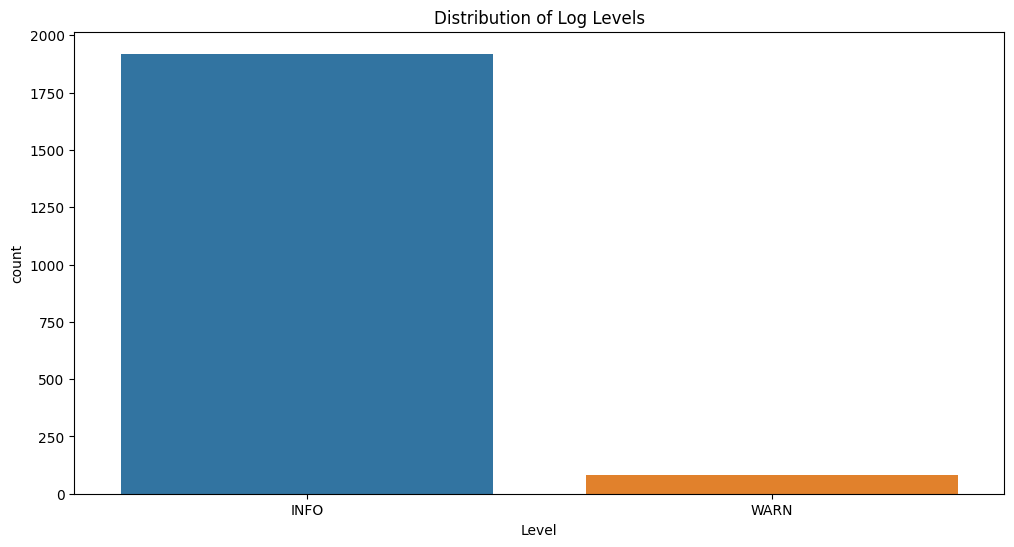

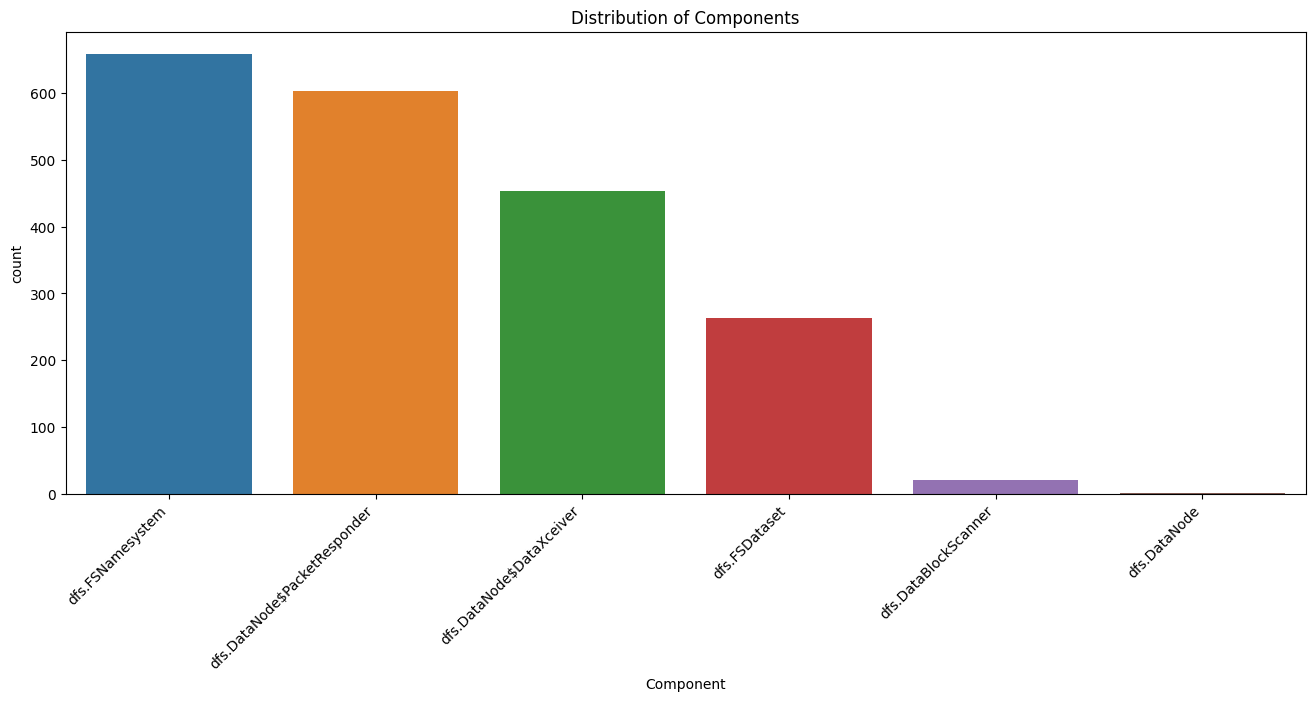

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Level', data=df1)
plt.title('Distribution of Log Levels')
plt.show()

plt.figure(figsize=(16, 6))
sns.countplot(x='Component', data=df1, order=df1['Component'].value_counts().index)
plt.title('Distribution of Components')
plt.xticks(rotation=45, ha='right')
plt.show()

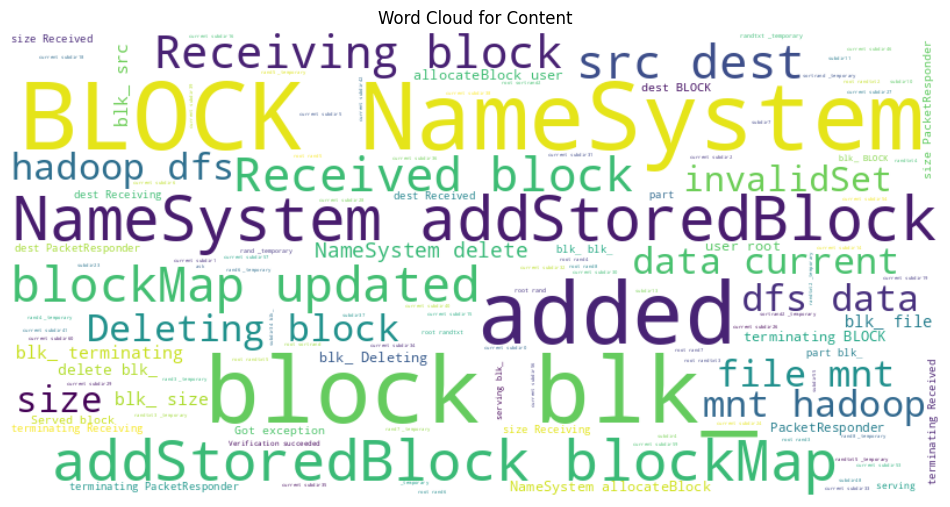

In [13]:
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df1['Content']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Content')
plt.show()

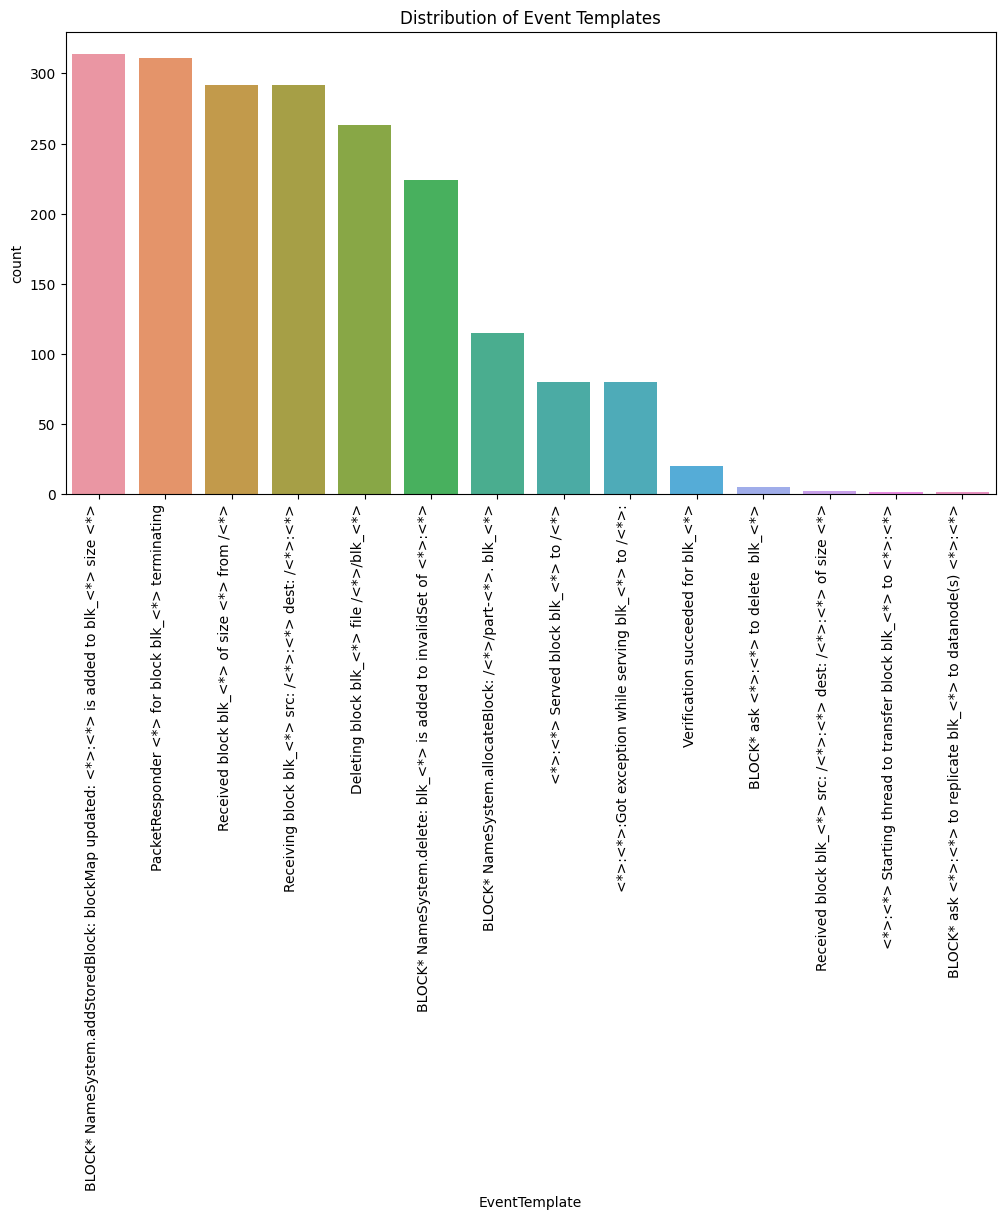

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='EventTemplate', data=df, order=df['EventTemplate'].value_counts().index)
plt.title('Distribution of Event Templates')
plt.xticks(rotation=90, ha='right')
plt.show()

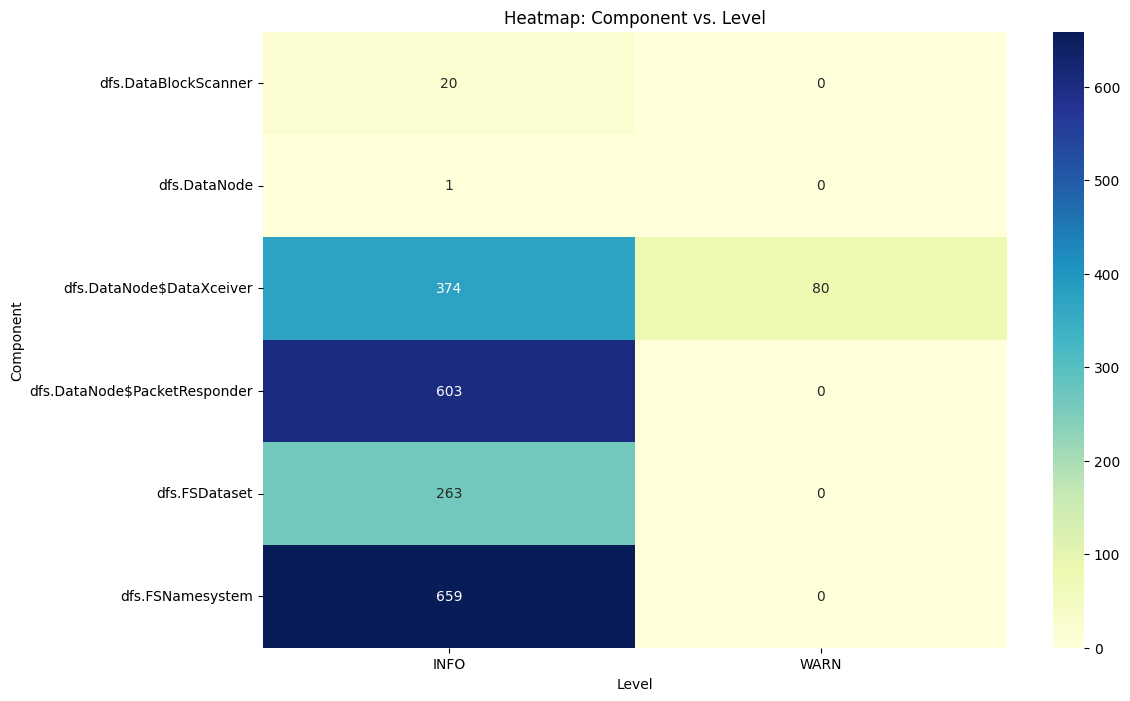

In [15]:
cross_tab = pd.crosstab(df1['Component'], df1['Level'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Component vs. Level')
plt.show()

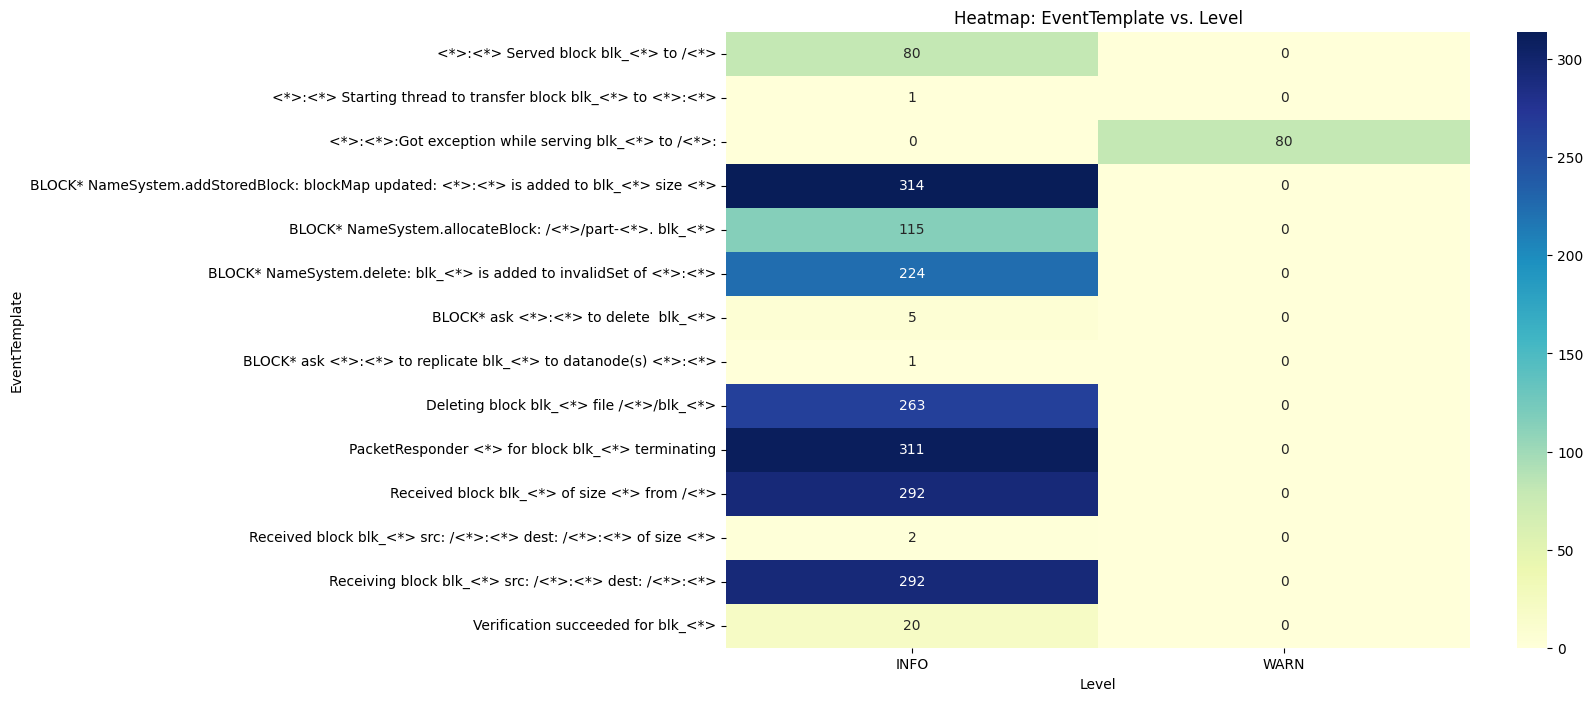

In [16]:
cross_tab_template = pd.crosstab(df1['EventTemplate'], df1['Level'])
plt.figure(figsize=(12, 8))
sns.heatmap(cross_tab_template, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: EventTemplate vs. Level')
plt.show()

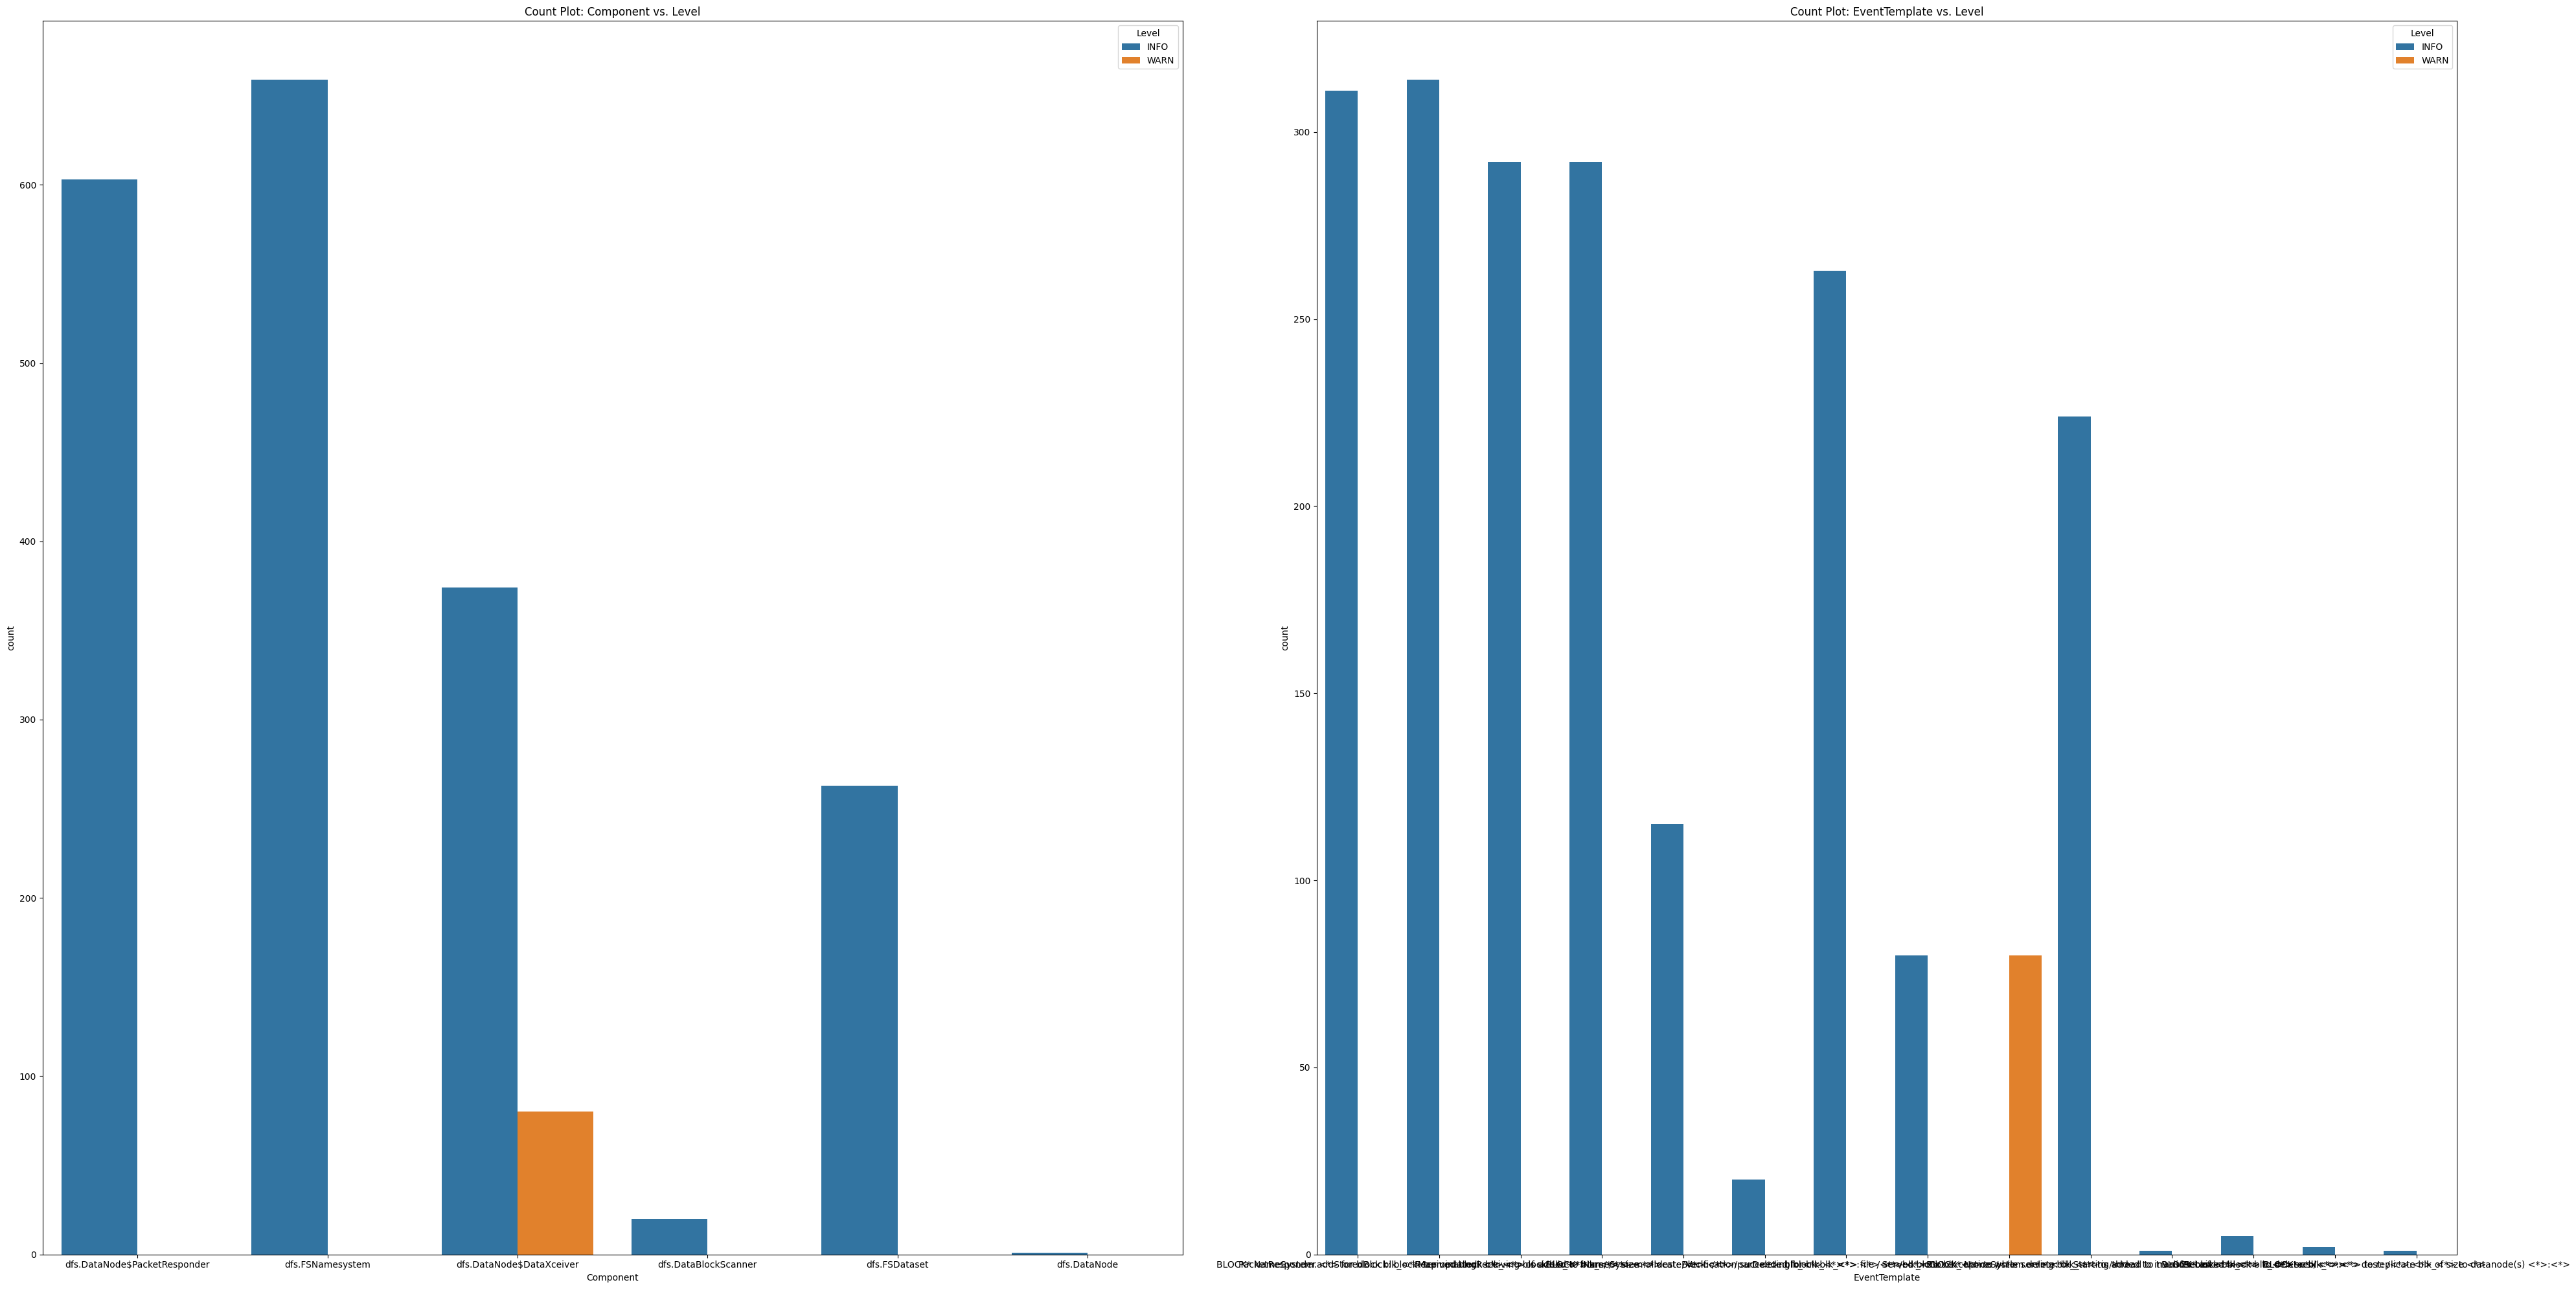

In [17]:
plt.figure(figsize=(40, 20))
plt.subplot(1, 2, 1)
sns.countplot(x='Component', hue='Level', data=df1)
plt.title('Count Plot: Component vs. Level')

plt.subplot(1, 2, 2)
sns.countplot(x='EventTemplate', hue='Level', data=df1)
plt.title('Count Plot: EventTemplate vs. Level')

plt.tight_layout()
plt.show()

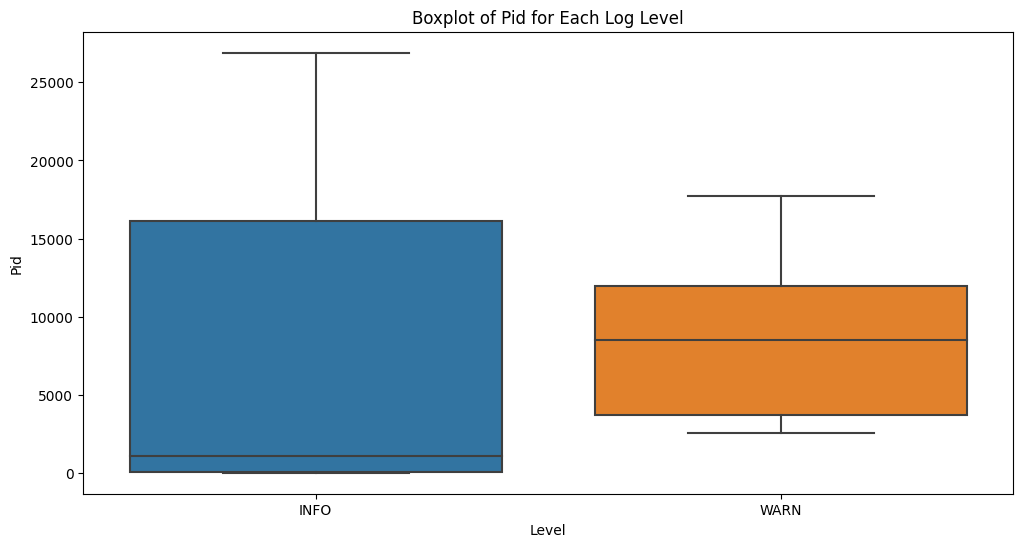

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Pid', data=df1)
plt.title('Boxplot of Pid for Each Log Level')
plt.show()

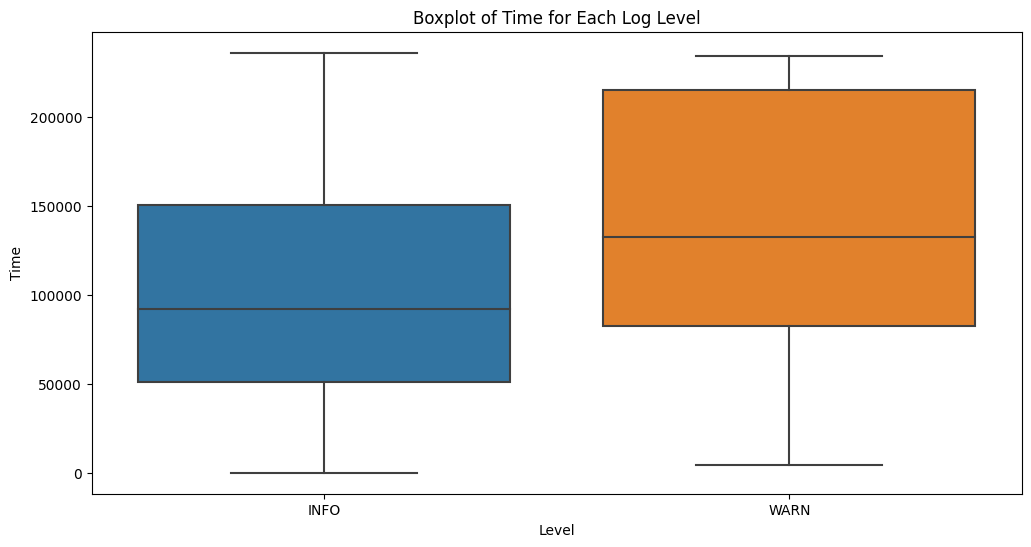

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Time', data=df1)
plt.title('Boxplot of Time for Each Log Level')
plt.show()

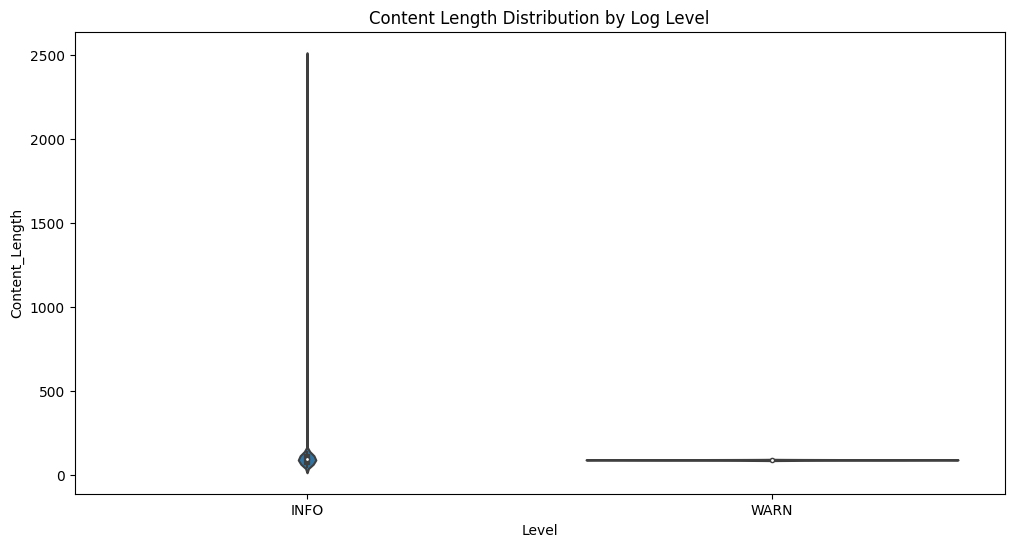

In [20]:
df1['Content_Length'] = df1['Content'].apply(len)
plt.figure(figsize=(12, 6))
sns.violinplot(x='Level', y='Content_Length', data=df1) # shows density and statistical summary for each
plt.title('Content Length Distribution by Log Level')
plt.show()

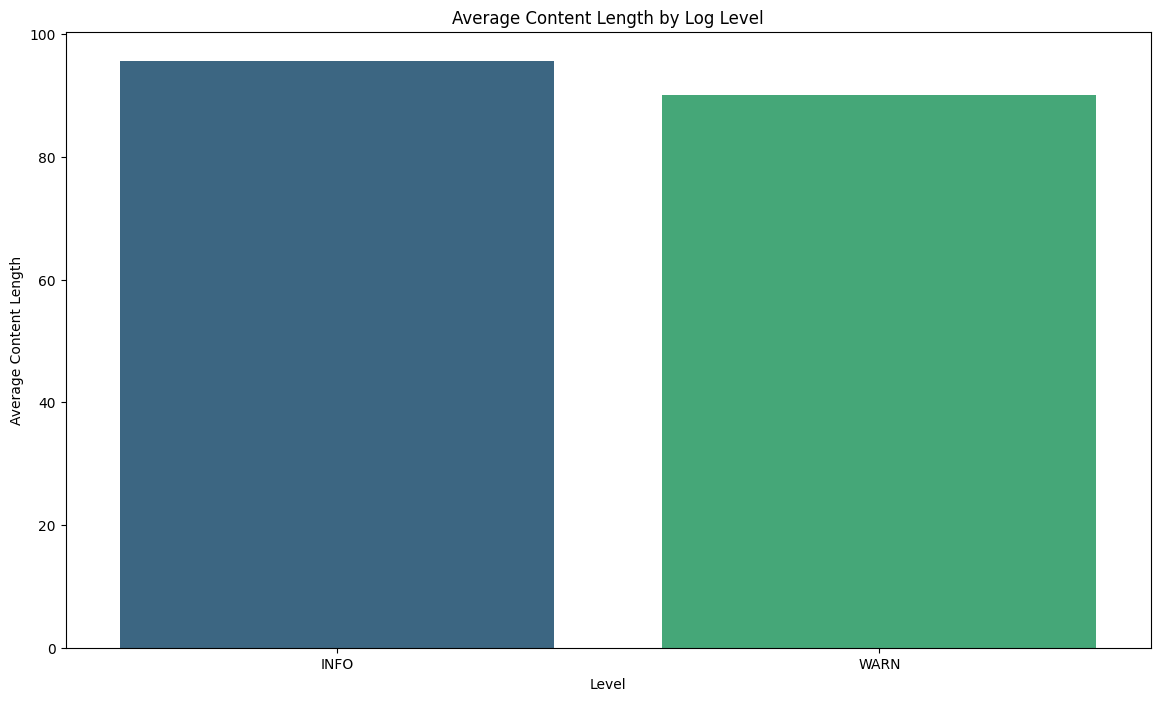

In [21]:
df1['Content_Length'] = df1['Content'].apply(len)

plt.figure(figsize=(14, 8))
sns.barplot(x='Level', y='Content_Length', data=df1, errorbar=None, palette='viridis')
plt.title('Average Content Length by Log Level')
plt.ylabel('Average Content Length')
plt.show()

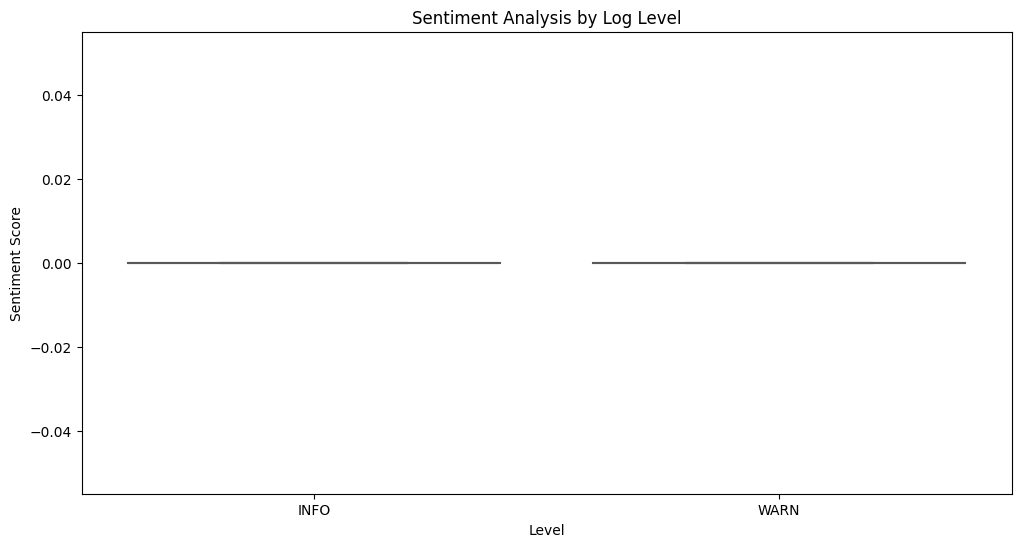

In [22]:
df1['Sentiment'] = df1['Content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.boxplot(x='Level', y='Sentiment', data=df1, palette='Set2')
plt.title('Sentiment Analysis by Log Level')
plt.ylabel('Sentiment Score')
plt.show()


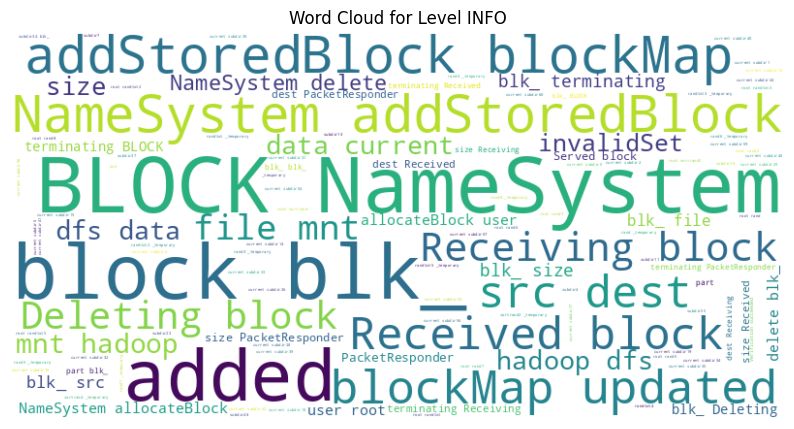

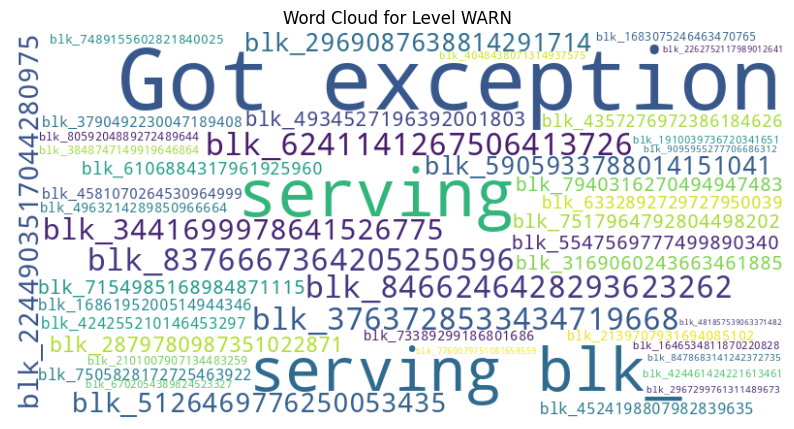

In [23]:
levels = df1['Level'].unique()
for level in levels:
    plt.figure(figsize=(10, 6))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1[df1['Level'] == level]['Content']))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Level {level}')
    plt.axis('off')
    plt.show()

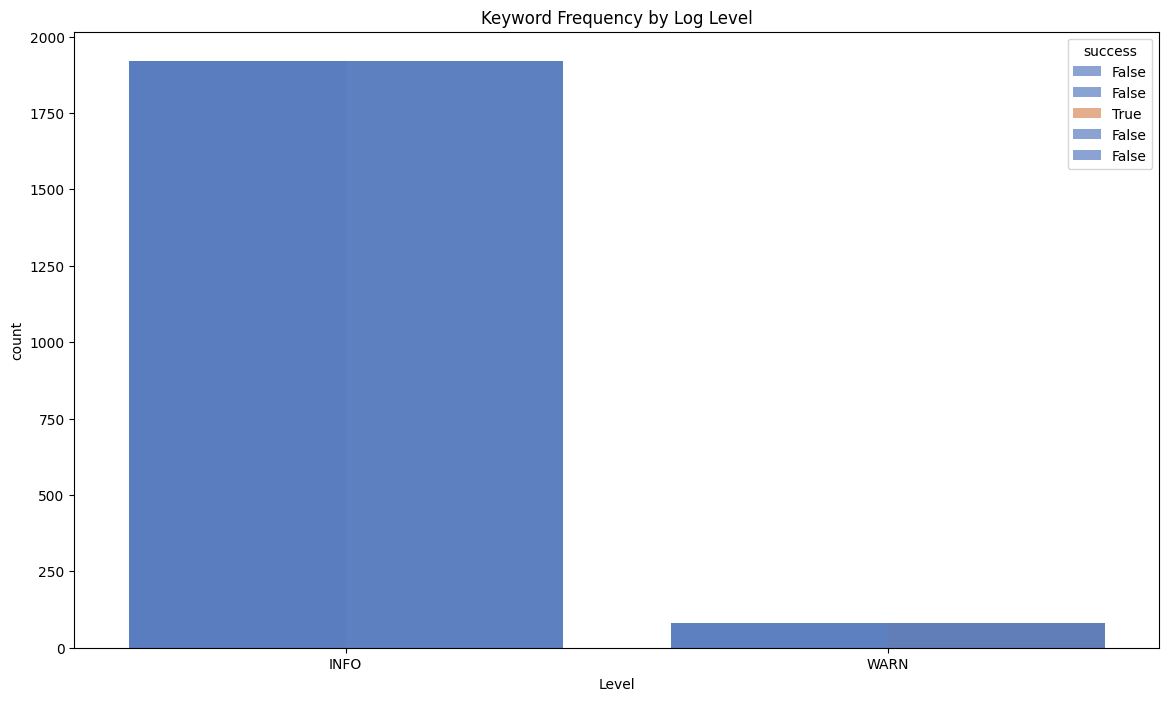

In [24]:
keywords = ['error', 'exception', 'warning', 'success']
plt.figure(figsize=(14, 8))
for keyword in keywords:
    df1[keyword] = df1['Content'].apply(lambda x: keyword in str(x).lower())
    sns.countplot(x='Level', hue=keyword, data=df1, palette='muted', alpha=0.7)

plt.title('Keyword Frequency by Log Level')
plt.show()

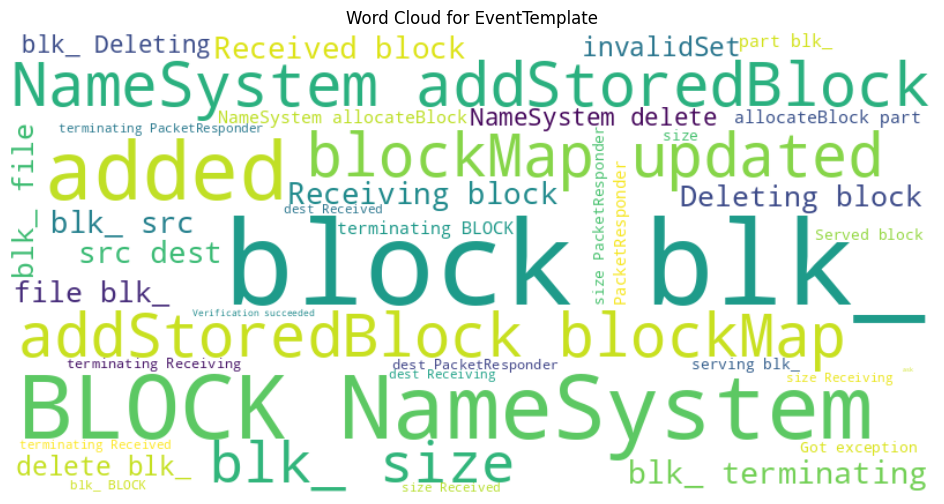

In [25]:
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df1['EventTemplate']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for EventTemplate')
plt.show()

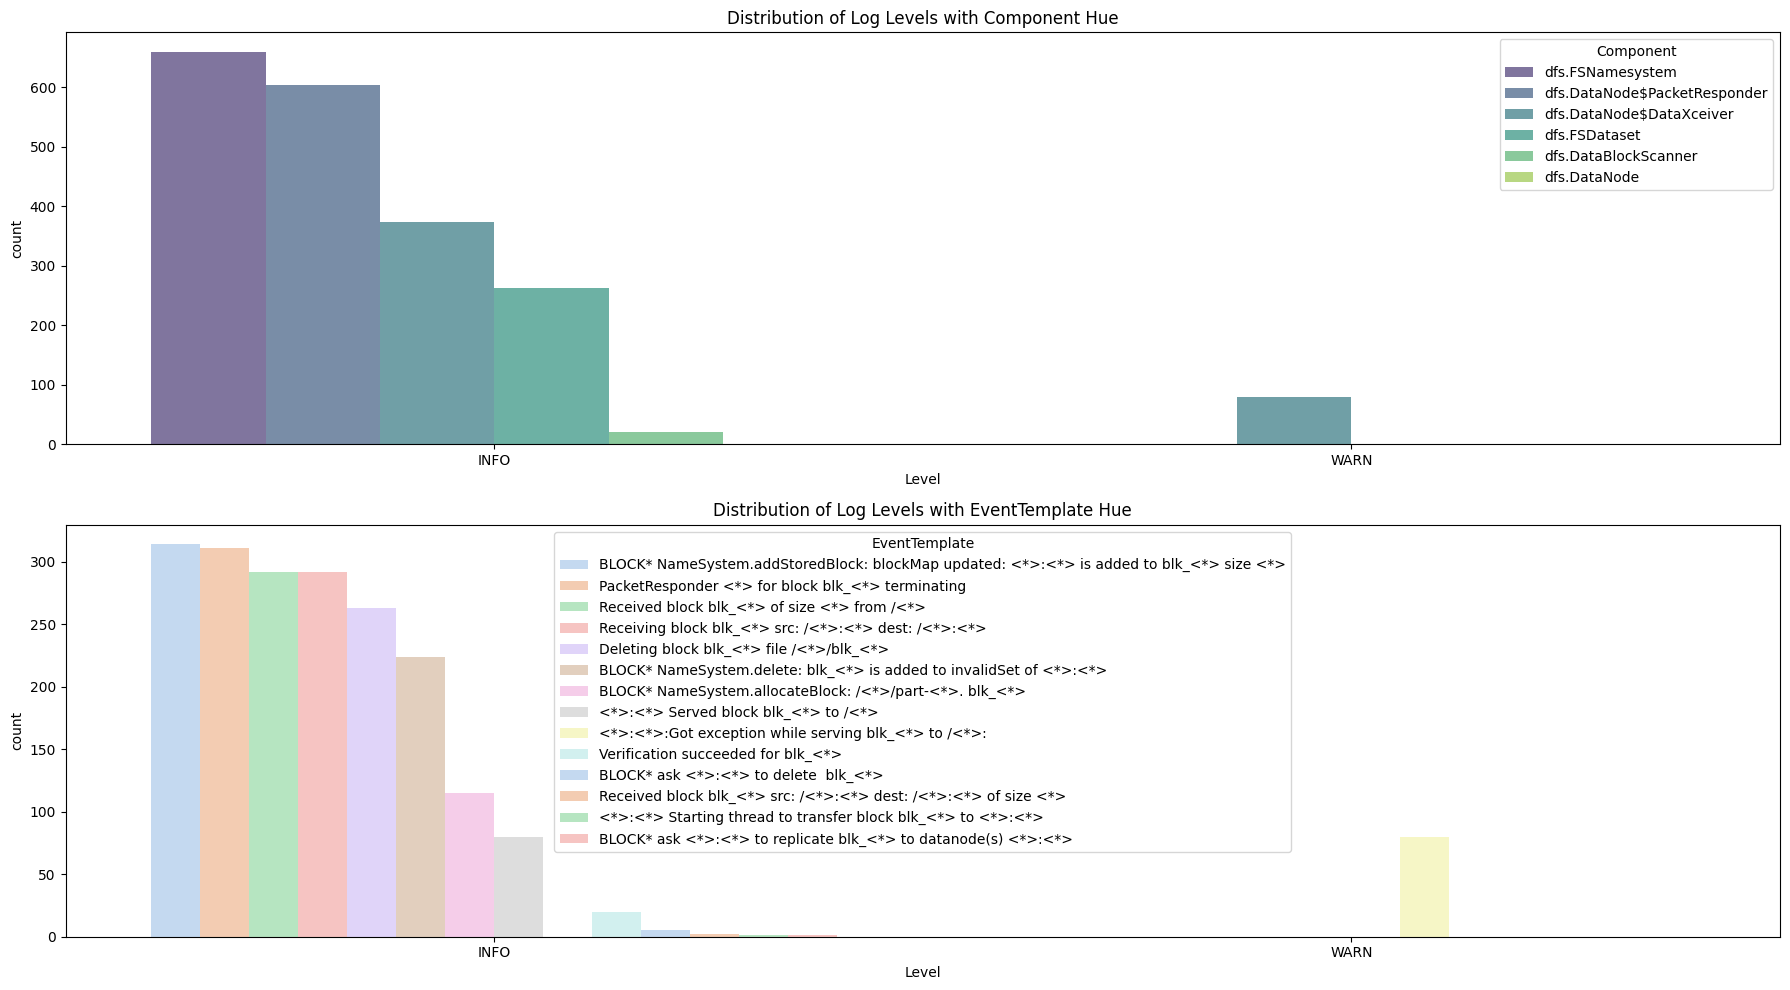

In [26]:
plt.figure(figsize=(18, 10))

plt.subplot(2, 1, 1)
sns.countplot(x='Level', hue='Component', data=df1, hue_order=df1['Component'].value_counts().index,
              palette='viridis', alpha=0.7)
plt.title('Distribution of Log Levels with Component Hue')

plt.subplot(2, 1, 2)
sns.countplot(x='Level', hue='EventTemplate', data=df1, hue_order=df1['EventTemplate'].value_counts().index,
              palette='pastel', alpha=0.7)
plt.title('Distribution of Log Levels with EventTemplate Hue')

plt.tight_layout()
plt.show()

##DATASET PREPROCESSING

In [27]:
!pip install flair

In [28]:
!pip install Faker

In [29]:
from flair.data import Sentence

In [30]:
df1['Content'][0]

'PacketResponder 1 for block blk_38865049064139660 terminating'

In [31]:
#mask the numerical part of the content in order to anonymize it and after performing this we could see some similarity between th event_template and content column
for index, row in df1.iterrows():
    sentence = Sentence(row['Content'])
    sentence_tokenized = [token.text for token in sentence]
    print(sentence_tokenized)
    masked_sentence = [''.join(['<MASK>' if char.isdigit() else char for char in token]) if 'blk' not in token else token for token in sentence_tokenized]
    anonymized_content = ' '.join(masked_sentence)

    df1.at[index, 'Content'] = anonymized_content


['PacketResponder', '1', 'for', 'block', 'blk', '_', '38865049064139660', 'terminating']
['PacketResponder', '0', 'for', 'block', 'blk', '_-', '6952295868487656571', 'terminating']
['BLOCK', '*', 'NameSystem.addStoredBlock', ':', 'blockMap', 'updated', ':', '10.251.73.220:50010', 'is', 'added', 'to', 'blk', '_', '7128370237687728475', 'size', '67108864']
['PacketResponder', '2', 'for', 'block', 'blk', '_', '8229193803249955061', 'terminating']
['PacketResponder', '2', 'for', 'block', 'blk', '_-', '6670958622368987959', 'terminating']
['BLOCK', '*', 'NameSystem.addStoredBlock', ':', 'blockMap', 'updated', ':', '10.251.43.115:50010', 'is', 'added', 'to', 'blk', '_', '3050920587428079149', 'size', '67108864']
['BLOCK', '*', 'NameSystem.addStoredBlock', ':', 'blockMap', 'updated', ':', '10.251.203.80:50010', 'is', 'added', 'to', 'blk', '_', '7888946331804732825', 'size', '67108864']
['BLOCK', '*', 'NameSystem.addStoredBlock', ':', 'blockMap', 'updated', ':', '10.250.11.85:50010', 'is', 'ad

In [32]:
for index, row in df1.iterrows():
    sentence = Sentence(row['Content'])
    sentence_tokenized = [token.text for token in sentence]
    masked_sentence = []
    consecutive_mask = False
    for token in sentence_tokenized:
        if 'blk' not in token:
            masked_token = '<MASK>' if any(char.isdigit() for char in token) else token
            if masked_token == '<MASK>' and consecutive_mask:
                continue
            elif masked_token == '<MASK>':
                consecutive_mask = True
            else:
                consecutive_mask = False
            masked_sentence.append(masked_token)
        else:
            masked_sentence.append(token)

    # print(masked_sentence)

    anonymized_content = ' '.join(masked_sentence)
    #print(anonymized_content)
    df1.at[index, 'Content'] = anonymized_content


df1['Content'] # this is the resulting dataset containing the maksed numerical values in the content column

0       PacketResponder < MASK > for block blk _ < MAS...
1       PacketResponder < MASK > for block blk _- < MA...
2       BLOCK * NameSystem.addStoredBlock : blockMap u...
3       PacketResponder < MASK > for block blk _ < MAS...
4       PacketResponder < MASK > for block blk _- < MA...
                              ...                        
1995    Receiving block blk _ < MASK >< MASK >< MASK >...
1996    Received block blk _- < MASK >< MASK >< MASK >...
1997    Receiving block blk _- < MASK >< MASK >< MASK ...
1998    PacketResponder < MASK > for block blk _ < MAS...
1999    Receiving block blk _ < MASK >< MASK >< MASK >...
Name: Content, Length: 2000, dtype: object

In [33]:
df1

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate,Content_Length,Sentiment,error,exception,warning,success
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder < MASK > for block blk _ < MAS...,E10,PacketResponder <*> for block blk_<*> terminating,61,0.0,False,False,False,False
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder < MASK > for block blk _- < MA...,E10,PacketResponder <*> for block blk_<*> terminating,64,0.0,False,False,False,False
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK * NameSystem.addStoredBlock : blockMap u...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...,121,0.0,False,False,False,False
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder < MASK > for block blk _ < MAS...,E10,PacketResponder <*> for block blk_<*> terminating,63,0.0,False,False,False,False
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder < MASK > for block blk _- < MA...,E10,PacketResponder <*> for block blk_<*> terminating,64,0.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,81111,101621,24902,INFO,dfs.DataNode$DataXceiver,Receiving block blk _ < MASK >< MASK >< MASK >...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...,92,0.0,False,False,False,False
1996,1997,81111,101735,26595,INFO,dfs.DataNode$PacketResponder,Received block blk _- < MASK >< MASK >< MASK >...,E11,Received block blk_<*> of size <*> from /<*>,77,0.0,False,False,False,False
1997,1998,81111,101804,26494,INFO,dfs.DataNode$DataXceiver,Receiving block blk _- < MASK >< MASK >< MASK ...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...,90,0.0,False,False,False,False
1998,1999,81111,101954,26414,INFO,dfs.DataNode$PacketResponder,PacketResponder < MASK > for block blk _ < MAS...,E10,PacketResponder <*> for block blk_<*> terminating,63,0.0,False,False,False,False


In [34]:
df2 #original dataset

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,E10,PacketResponder <*> for block blk_<*> terminating
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,E10,PacketResponder <*> for block blk_<*> terminating
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,E10,PacketResponder <*> for block blk_<*> terminating
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,E10,PacketResponder <*> for block blk_<*> terminating
...,...,...,...,...,...,...,...,...,...
1995,1996,81111,101621,24902,INFO,dfs.DataNode$DataXceiver,Receiving block blk_4198733391373026104 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1996,1997,81111,101735,26595,INFO,dfs.DataNode$PacketResponder,Received block blk_-5815145248455404269 of siz...,E11,Received block blk_<*> of size <*> from /<*>
1997,1998,81111,101804,26494,INFO,dfs.DataNode$DataXceiver,Receiving block blk_-295306975763175640 src: /...,E13,Receiving block blk_<*> src: /<*>:<*> dest: /<...
1998,1999,81111,101954,26414,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_52257196770490...,E10,PacketResponder <*> for block blk_<*> terminating


##MODEL PREPARATION


###BEFORE MASKING

In [36]:
nlp = spacy.load("en_core_web_sm")
X = df2['Content']
y = df2['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X

0       PacketResponder 1 for block blk_38865049064139...
1       PacketResponder 0 for block blk_-6952295868487...
2       BLOCK* NameSystem.addStoredBlock: blockMap upd...
3       PacketResponder 2 for block blk_82291938032499...
4       PacketResponder 2 for block blk_-6670958622368...
                              ...                        
1995    Receiving block blk_4198733391373026104 src: /...
1996    Received block blk_-5815145248455404269 of siz...
1997    Receiving block blk_-295306975763175640 src: /...
1998    PacketResponder 0 for block blk_52257196770490...
1999    Receiving block blk_4343207286455274569 src: /...
Name: Content, Length: 2000, dtype: object

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

X_train_tfidf

<1600x2516 sparse matrix of type '<class 'numpy.float64'>'
	with 18450 stored elements in Compressed Sparse Row format>

In [39]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)

print("X_train_tfidf:", X_train_tfidf[:5])
print("y_train:", y_train[:5])

X_train_tfidf shape: (1600, 2516)
y_train shape: (1600,)
X_train_tfidf:   (0, 777)	0.08612202078441596
  (0, 2405)	0.14690482107281336
  (0, 960)	0.3896127435827074
  (0, 194)	0.5509613418633805
  (0, 415)	0.5116448180932978
  (0, 348)	0.1655889242412587
  (0, 90)	0.14562267338393461
  (0, 2442)	0.14690482107281336
  (0, 355)	0.3896127435827074
  (0, 1496)	0.08580457291409523
  (0, 2398)	0.05342846993430125
  (0, 2434)	0.14711649678426975
  (1, 2508)	0.3065762056415686
  (1, 560)	0.8223901188150201
  (1, 2409)	0.30029206659943747
  (1, 2418)	0.3065762056415686
  (1, 1496)	0.1811153102047219
  (1, 2398)	0.11277620268097646
  (2, 283)	0.45181489590255064
  (2, 630)	0.3654908708735136
  (2, 2417)	0.1785226043168145
  (2, 2413)	0.24252116252039205
  (2, 2510)	0.15760635011255844
  (2, 1492)	0.1785226043168145
  (2, 2414)	0.1785226043168145
  :	:
  (3, 2438)	0.2570008666448373
  (3, 2515)	0.2570008666448373
  (3, 2407)	0.2570008666448373
  (3, 2411)	0.2570008666448373
  (3, 228)	0.316284314

In [40]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)
predictions = classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       1.00      0.09      0.17        11

    accuracy                           0.97       400
   macro avg       0.99      0.55      0.58       400
weighted avg       0.98      0.97      0.96       400



In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [42]:
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


for clf_name, classifier in classifiers:

    classifier.fit(X_train_tfidf, y_train)


    predictions = classifier.predict(X_test_tfidf)


    accuracy = accuracy_score(y_test, predictions)
    print(f'{clf_name} Accuracy: {accuracy:.2f}')
    print(f'{clf_name} Classification Report:')
    print(classification_report(y_test, predictions))
    print('\n')

Multinomial Naive Bayes Accuracy: 0.97
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       1.00      0.09      0.17        11

    accuracy                           0.97       400
   macro avg       0.99      0.55      0.58       400
weighted avg       0.98      0.97      0.96       400



Logistic Regression Accuracy: 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        INFO       1.00      1.00      1.00       389
        WARN       1.00      1.00      1.00        11

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



Random Forest Accuracy: 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

        INFO       1.00      1.00      1.00       389
   

In [43]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


X_train_padded = pad_sequences(X_train_seq, maxlen=100)
X_test_padded = pad_sequences(X_test_seq, maxlen=100)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=32, input_length=100))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)
accuracy = model.evaluate(X_test_padded, y_test_encoded)[1]
print(f'Neural Network Accuracy: {accuracy:.2f}')

Epoch 1/10
45/45 [==============================] - 2s 24ms/step - loss: 0.1831 - accuracy: 0.9556 - val_loss: 0.0822 - val_accuracy: 0.9563
Epoch 2/10
45/45 [==============================] - 1s 17ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0133 - val_accuracy: 1.0000
Epoch 3/10
45/45 [==============================] - 1s 13ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 1s 16ms/step - loss: 9.5073e-04 - accuracy: 1.0000 - val_loss: 8.5431e-04 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 1s 16ms/step - loss: 5.5208e-04 - accuracy: 1.0000 - val_loss: 5.4334e-04 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 1s 14ms/step - loss: 3.6202e-04 - accuracy: 1.0000 - val_loss: 3.7114e-04 - val_accura

In [44]:
for idx, content in enumerate(X_test):
    prediction = classifier.predict(tfidf_vectorizer.transform([content]))[0]
    actual_label = y_test.iloc[idx]
    print(f"Content: {content}\nPredicted: {prediction}\nActual: {actual_label}\n")

Content: BLOCK* NameSystem.delete: blk_-793506372912437289 is added to invalidSet of 10.250.17.225:50010
Predicted: INFO
Actual: INFO

Content: 10.251.126.22:50010:Got exception while serving blk_1686195200514944346 to /10.250.6.223:
Predicted: WARN
Actual: WARN

Content: PacketResponder 2 for block blk_6918427074195439966 terminating
Predicted: INFO
Actual: INFO

Content: PacketResponder 0 for block blk_2089955821703690032 terminating
Predicted: INFO
Actual: INFO

Content: PacketResponder 1 for block blk_4638603954320058978 terminating
Predicted: INFO
Actual: INFO

Content: Received block blk_-577659324269246113 of size 67108864 from /10.251.203.179
Predicted: INFO
Actual: INFO

Content: Received block blk_6323743466920239525 of size 67108864 from /10.250.15.67
Predicted: INFO
Actual: INFO

Content: Deleting block blk_-6750694665033046901 file /mnt/hadoop/dfs/data/current/subdir63/blk_-6750694665033046901
Predicted: INFO
Actual: INFO

Content: Received block blk_7577595658377008671 of

### After Masking

In [45]:
X_df=df1['Content']
y_df=df1['Level']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [46]:
tfidf_vectorizerr = TfidfVectorizer(max_features=5000)
X1_train_tfidf = tfidf_vectorizerr.fit_transform(X1_train)
X1_test_tfidf = tfidf_vectorizerr.transform(X1_test)

X1_train_tfidf

<1600x52 sparse matrix of type '<class 'numpy.float64'>'
	with 13281 stored elements in Compressed Sparse Row format>

In [47]:
print("X_train_tfidf shape:", X1_train_tfidf.shape)
print("y_train shape:", y1_train.shape)

print("X_train_tfidf:", X1_train_tfidf[:5])
print("y_train:", y1_train[:5])

X_train_tfidf shape: (1600, 52)
y_train shape: (1600,)
X_train_tfidf:   (0, 12)	0.05880397267246105
  (0, 38)	0.05880397267246105
  (0, 22)	0.9943576367516892
  (0, 4)	0.020293012994932434
  (0, 5)	0.021386679232200424
  (0, 31)	0.0588887035387526
  (1, 44)	0.13874214738013224
  (1, 16)	0.1358982380059
  (1, 26)	0.13874214738013224
  (1, 22)	0.9685467938336425
  (1, 4)	0.04842733969168213
  (1, 5)	0.05103726983831569
  (2, 25)	0.06713831312789191
  (2, 20)	0.09120672315836728
  (2, 46)	0.05927218306776896
  (2, 0)	0.06713831312789191
  (2, 21)	0.06713831312789191
  (2, 10)	0.09043371630941154
  (2, 24)	0.06153251917132587
  (2, 22)	0.9802685649065496
  (2, 4)	0.0288314283796044
  (2, 5)	0.030385261701391445
  (3, 35)	0.09419129382804227
  (3, 51)	0.09419129382804227
  (3, 14)	0.09419129382804227
  (3, 18)	0.09419129382804227
  (3, 46)	0.0468875136014462
  (3, 22)	0.98071065674002
  (3, 4)	0.022807224575349304
  (4, 25)	0.06908981227319351
  (4, 20)	0.09385781512057163
  (4, 46)	0.06099

In [52]:
classifierr = MultinomialNB()
classifierr.fit(X1_train_tfidf, y1_train)
predictions1 = classifierr.predict(X1_test_tfidf)
accuracy1 = accuracy_score(y1_test, predictions)
print(f'Accuracy: {accuracy1:.2f}')

print("Classification Report:")
print(classification_report(y1_test, predictions1))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       0.00      0.00      0.00        11

    accuracy                           0.97       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.95      0.97      0.96       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
classifiers = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]


for clf_name, classifier in classifiers:

    classifier.fit(X1_train_tfidf, y1_train)


    predictions = classifier.predict(X1_test_tfidf)


    accuracy1 = accuracy_score(y1_test, predictions1)
    print(f'{clf_name} Accuracy: {accuracy1:.2f}')
    print(f'{clf_name} Classification Report:')
    print(classification_report(y1_test, predictions1))
    print('\n')

Multinomial Naive Bayes Accuracy: 0.97
Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       0.00      0.00      0.00        11

    accuracy                           0.97       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.95      0.97      0.96       400



Logistic Regression Accuracy: 0.97
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       0.00      0.00      0.00        11

    accuracy                           0.97       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.95      0.97      0.96       400





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Random Forest Accuracy: 0.97
Random Forest Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       0.00      0.00      0.00        11

    accuracy                           0.97       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.95      0.97      0.96       400



Support Vector Machine Accuracy: 0.97
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

        INFO       0.97      1.00      0.99       389
        WARN       0.00      0.00      0.00        11

    accuracy                           0.97       400
   macro avg       0.49      0.50      0.49       400
weighted avg       0.95      0.97      0.96       400





/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [50]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X1_train)

X1_train_seq = tokenizer.texts_to_sequences(X1_train)
X1_test_seq = tokenizer.texts_to_sequences(X1_test)


X1_train_padded = pad_sequences(X1_train_seq, maxlen=100)
X1_test_padded = pad_sequences(X1_test_seq, maxlen=100)


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y1_train)
y_test_encoded = label_encoder.transform(y1_test)


model1 = Sequential()
model1.add(Embedding(input_dim=5000, output_dim=32, input_length=100))
model1.add(Flatten())
model1.add(Dense(64, activation='relu'))
model1.add(Dense(len(label_encoder.classes_), activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model1.fit(X1_train_padded, y_train_encoded, epochs=10, batch_size=32, validation_split=0.1)
accuracy = model.evaluate(X1_test_padded, y_test_encoded)[1]
print(f'Neural Network Accuracy: {accuracy:.2f}')

Epoch 1/10
45/45 [==============================] - 3s 27ms/step - loss: 0.1841 - accuracy: 0.9569 - val_loss: 0.1027 - val_accuracy: 0.9563
Epoch 2/10
45/45 [==============================] - 1s 23ms/step - loss: 0.0568 - accuracy: 0.9688 - val_loss: 0.0313 - val_accuracy: 0.9937
Epoch 3/10
45/45 [==============================] - 1s 19ms/step - loss: 0.0196 - accuracy: 0.9986 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 4/10
45/45 [==============================] - 1s 18ms/step - loss: 0.0063 - accuracy: 0.9993 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 5/10
45/45 [==============================] - 1s 16ms/step - loss: 0.0034 - accuracy: 0.9993 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 6/10
45/45 [==============================] - 1s 16ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 8.3341e-04 - val_accuracy: 1.0000
Epoch 7/10
45/45 [==============================] - 1s 14ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 6.3179e-04 - val_accuracy: 1.0000
Epoch

In [54]:
for idx, content in enumerate(X1_test):
    prediction = classifierr.predict(tfidf_vectorizerr.transform([content]))[0]
    actual_label = y1_test.iloc[idx]
    print(f"Content: {content}\nPredicted: {prediction}\nActual: {actual_label}\n")

Content: BLOCK * NameSystem.delete : blk _- < MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK > is added to invalidSet of < MASK >< MASK >.< MASK >< MASK >< MASK >.< MASK >< MASK >.< MASK >< MASK >< MASK >:< MASK >< MASK >< MASK >< MASK >< MASK >
Predicted: INFO
Actual: INFO

Content: < MASK >< MASK >.< MASK >< MASK >< MASK >.< MASK >< MASK >< MASK >.< MASK >< MASK >:< MASK >< MASK >< MASK >< MASK >< MASK > : Got exception while serving blk _ < MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK > to / < MASK >< MASK >.< MASK >< MASK >< MASK >.< MASK >.< MASK >< MASK >< MASK > :
Predicted: INFO
Actual: WARN

Content: PacketResponder < MASK > for block blk _ < MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >< MASK >